In [2]:
import ndlib
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
import matplotlib.pyplot as plt
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence

In [3]:
# directed graph of our network

g = nx.read_edgelist("D:/Dati PRAW/vecchi/SNA 14th commit/Project_Social_Network_Analysis-main/dati_ripuliti_edgelist.csv", delimiter=",", nodetype=str, create_using=nx.DiGraph())

n_nodes = g.number_of_nodes()
n_edges = g.number_of_edges()

print(n_nodes, ",", n_edges)

24819 , 107094


In [4]:
# infection rates (b) and recovery rates (u)

# first model
b = 0.359
u = 0.333

# second model (three phases)
# first phase
b1 = 0.298
u1 = 0.293

# second phase
b2 = 0.478
u2 = 0.444

# third phase
b3 = 0.043
u3 = 0.048

#print(b1,b2,b3,u1,u2,u3)

# First model (poor fit for the data)

In [121]:
model = ep.SISModel(g)
model.available_statuses

{'Susceptible': 0, 'Infected': 1}

In [122]:
cfg = mc.Configuration()
cfg.add_model_parameter('beta', b) # infection rate
cfg.add_model_parameter('lambda', u) # recovery rate
#cfg.add_model_parameter("percentage_infected", 0.0001)
infected_nodes = ['environment']
cfg.add_model_initial_configuration("Infected", infected_nodes)
model.set_initial_status(cfg)

In [123]:
iterations = model.iteration_bunch(20, node_status=True)
trends = model.build_trends(iterations)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.14it/s]


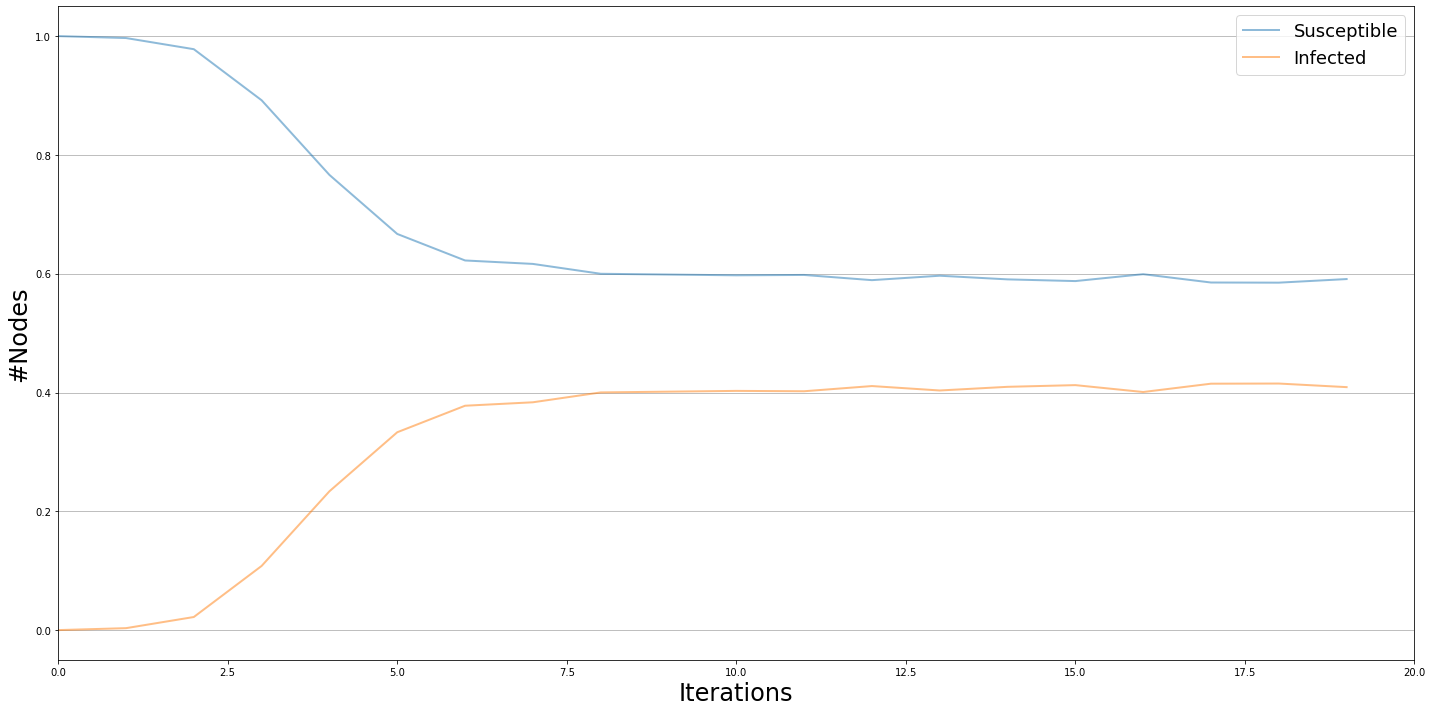

In [124]:
%matplotlib inline
viz = DiffusionTrend(model, trends)
viz.plot()

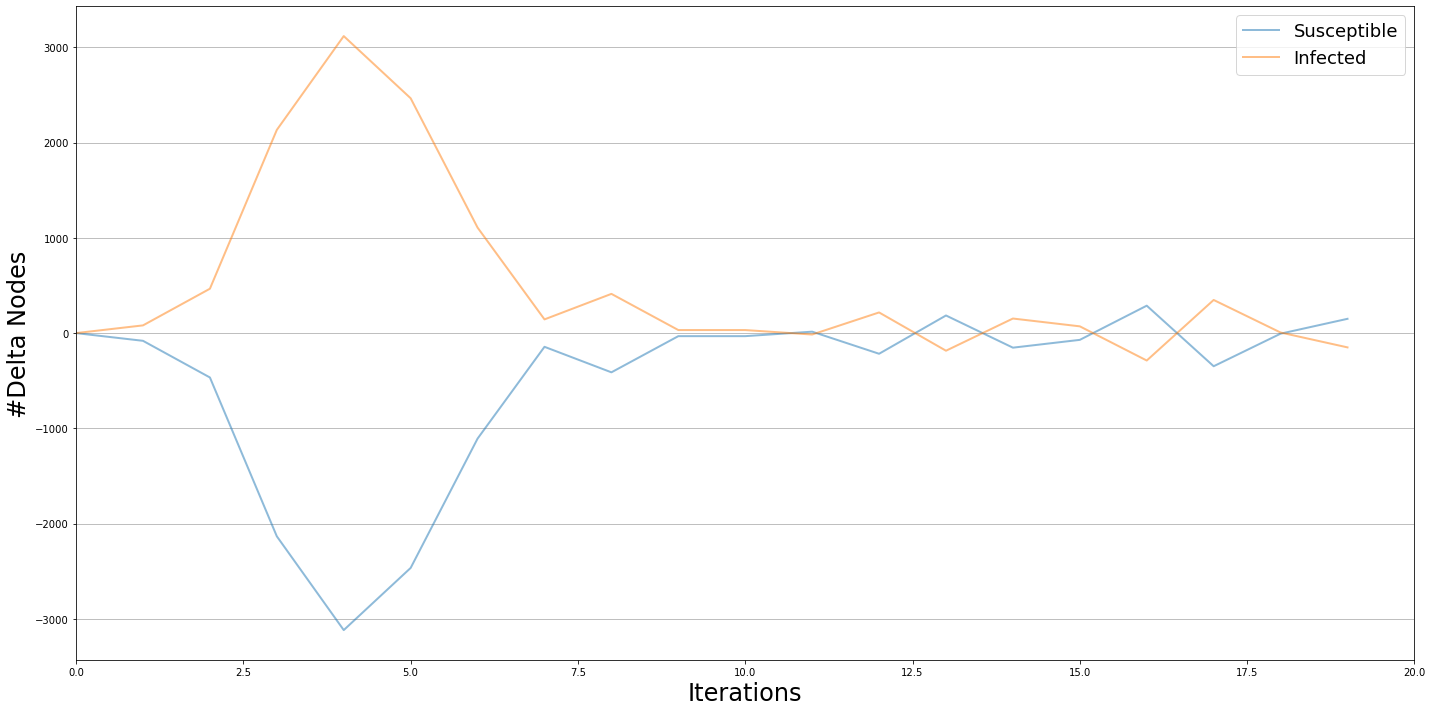

In [125]:
viz = DiffusionPrevalence(model, trends)
viz.plot()

# Second model (three phases)

## 1st phase

In [22]:
model = ep.SISModel(g)
model.available_statuses

{'Susceptible': 0, 'Infected': 1}

In [23]:
cfg = mc.Configuration()
cfg.add_model_parameter('beta', b1) # infection rate
cfg.add_model_parameter('lambda', u1) # recovery rate
#cfg.add_model_parameter("percentage_infected", 0.0001)
infected_nodes = ['wallstreetbets']
cfg.add_model_initial_configuration("Infected", infected_nodes)
model.set_initial_status(cfg)

In [24]:
iterations = model.iteration_bunch(20, node_status=True)
trends = model.build_trends(iterations)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:03<00:00,  5.40it/s]


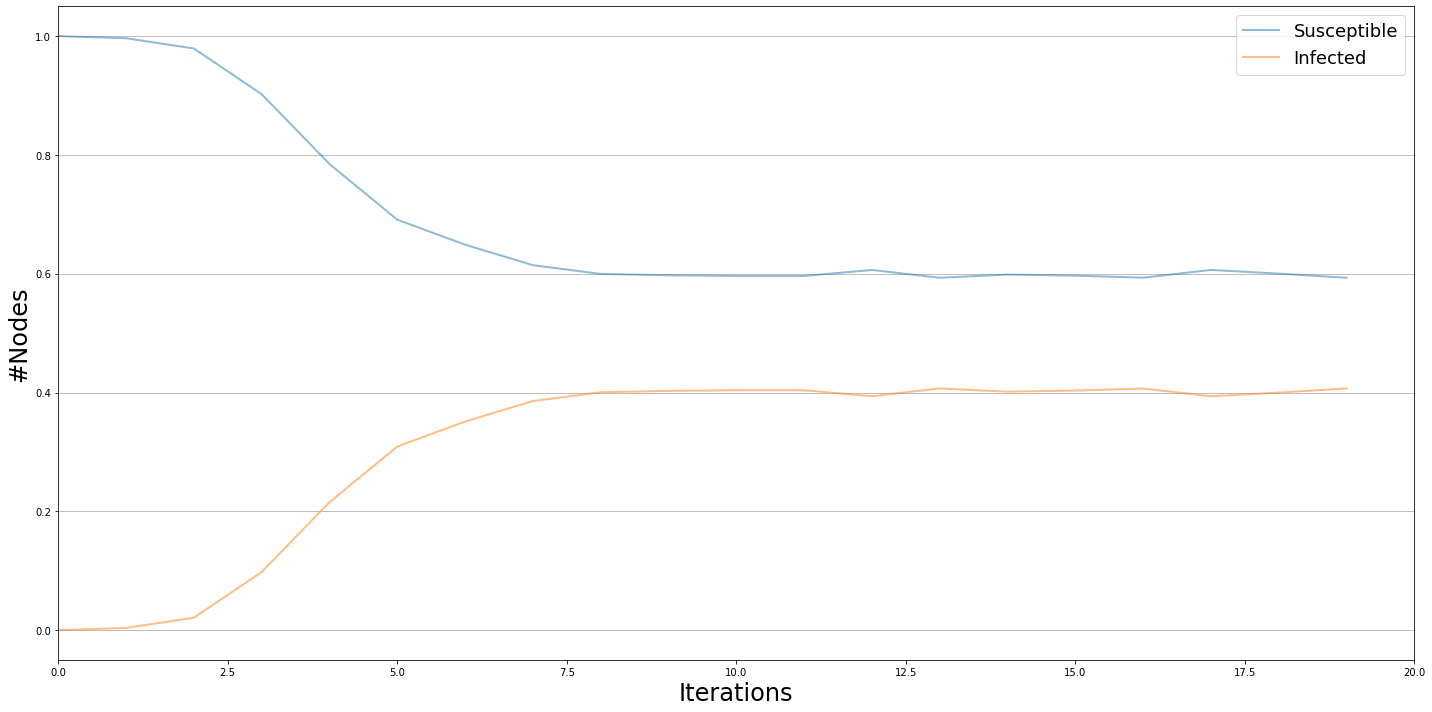

In [25]:
%matplotlib inline
viz = DiffusionTrend(model, trends)
viz.plot()

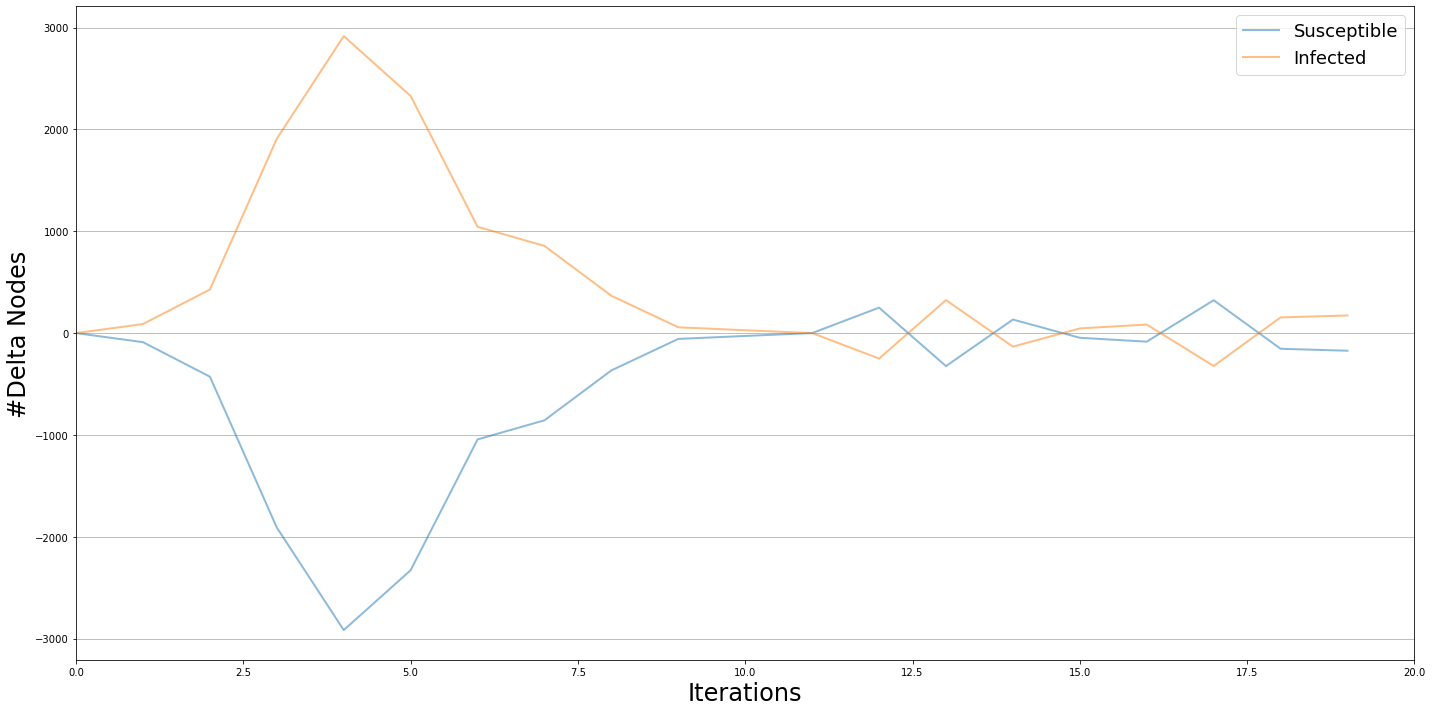

In [26]:
viz = DiffusionPrevalence(model, trends)
viz.plot()

## 2nd phase

In [110]:
model = ep.SISModel(g)
model.available_statuses

{'Susceptible': 0, 'Infected': 1}

In [111]:
# la % di già infetti presa per allineare con i dati di Paolo

cfg = mc.Configuration()
cfg.add_model_parameter('beta', b2) # infection rate
cfg.add_model_parameter('lambda', u2) # recovery rate
cfg.add_model_parameter("percentage_infected", 0.01)
model.set_initial_status(cfg)

In [112]:
iterations = model.iteration_bunch(20, node_status=True)
trends = model.build_trends(iterations)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:03<00:00,  5.23it/s]


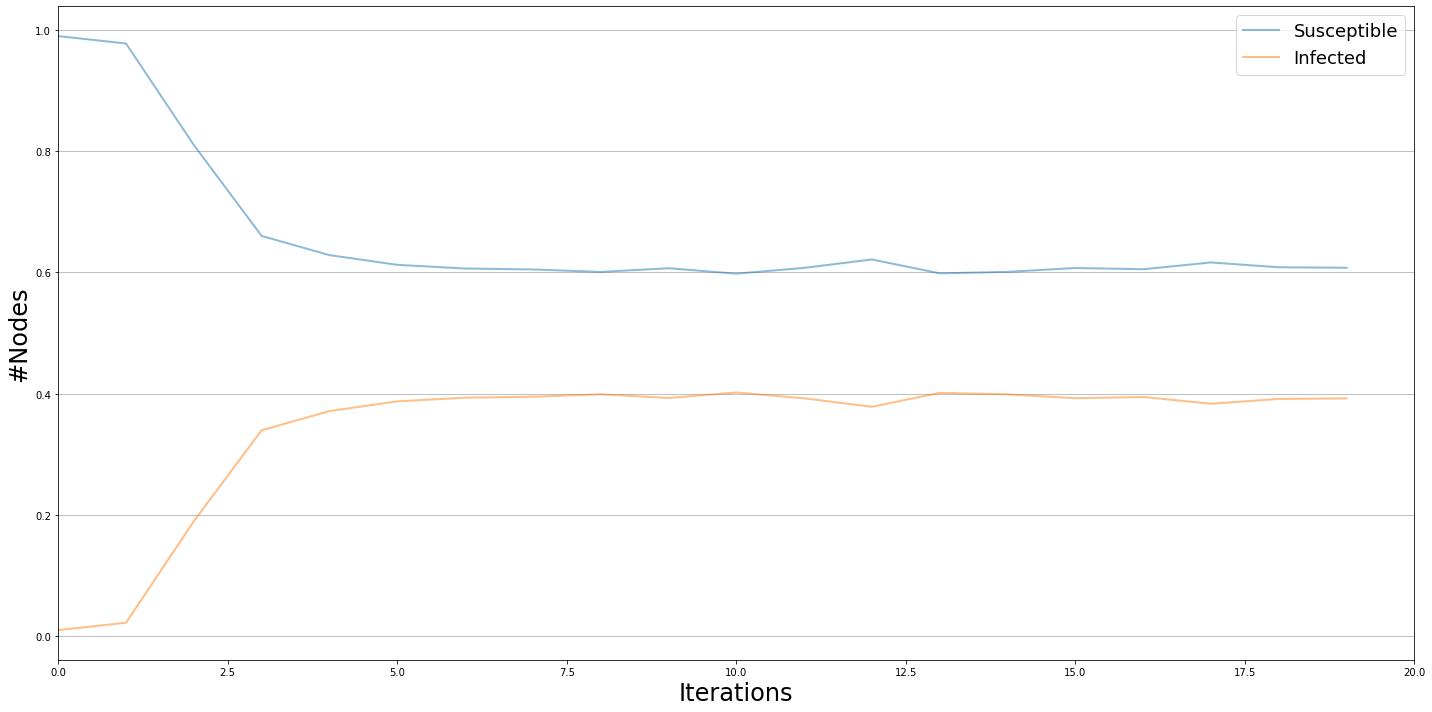

In [113]:
viz = DiffusionTrend(model, trends)
viz.plot()

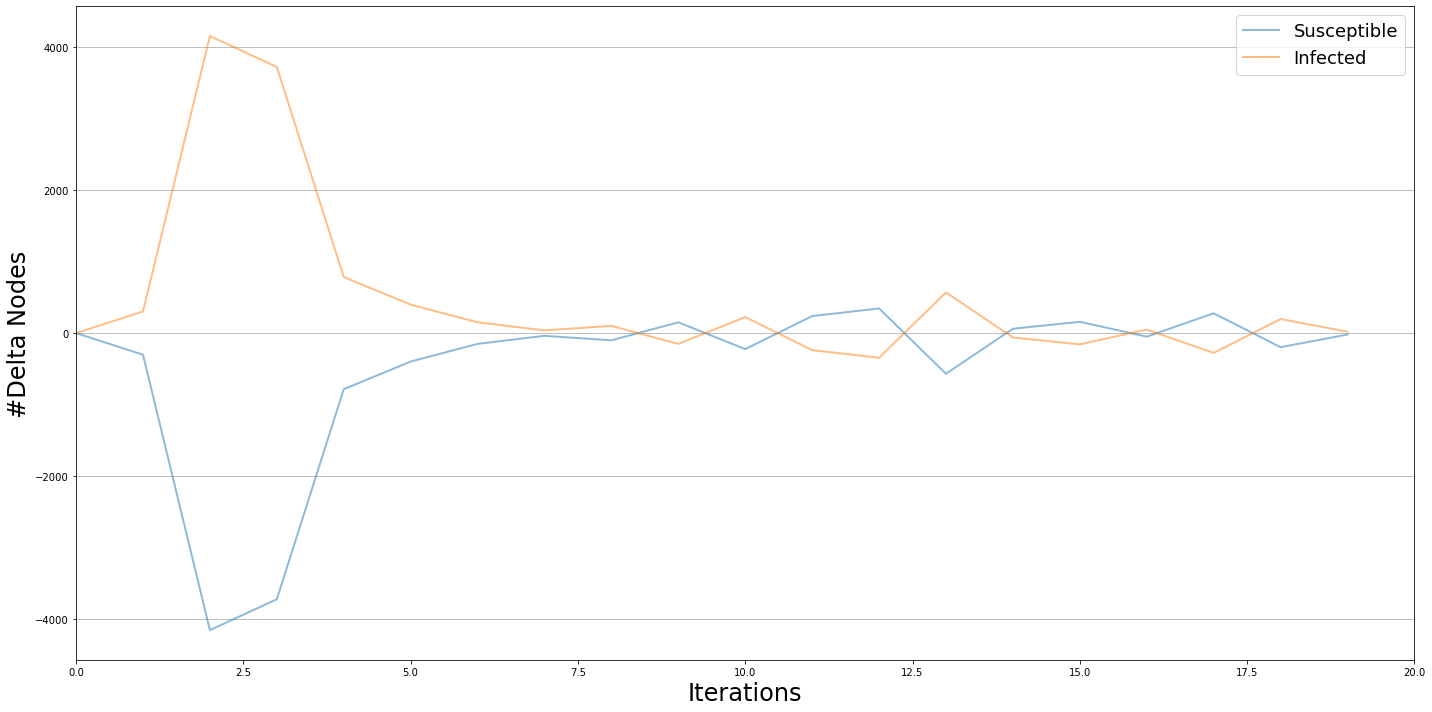

In [114]:
viz = DiffusionPrevalence(model, trends)
viz.plot()

## 3rd phase

## test 1: % infetti al 7%

In [97]:
model = ep.SISModel(g)
model.available_statuses

{'Susceptible': 0, 'Infected': 1}

In [98]:
# la % di già infetti presa per allineare con i dati di Paolo

cfg = mc.Configuration()
cfg.add_model_parameter('beta', b3) # infection rate
cfg.add_model_parameter('lambda', (u3)) # recovery rate

cfg.add_model_parameter("percentage_infected", 0.07)
model.set_initial_status(cfg)

In [99]:
iterations = model.iteration_bunch(100, node_status=True)
trends = model.build_trends(iterations)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:24<00:00,  4.06it/s]


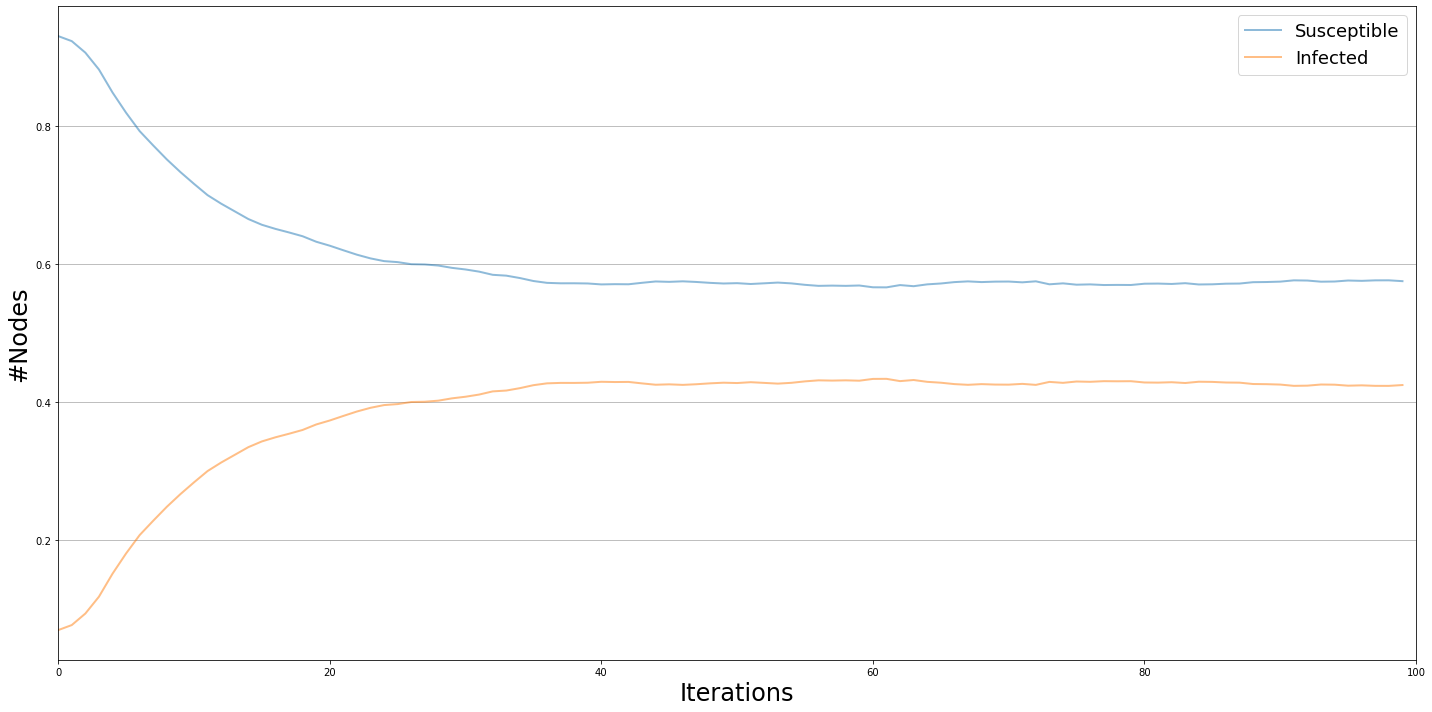

In [102]:
viz = DiffusionTrend(model, trends)
viz.plot()

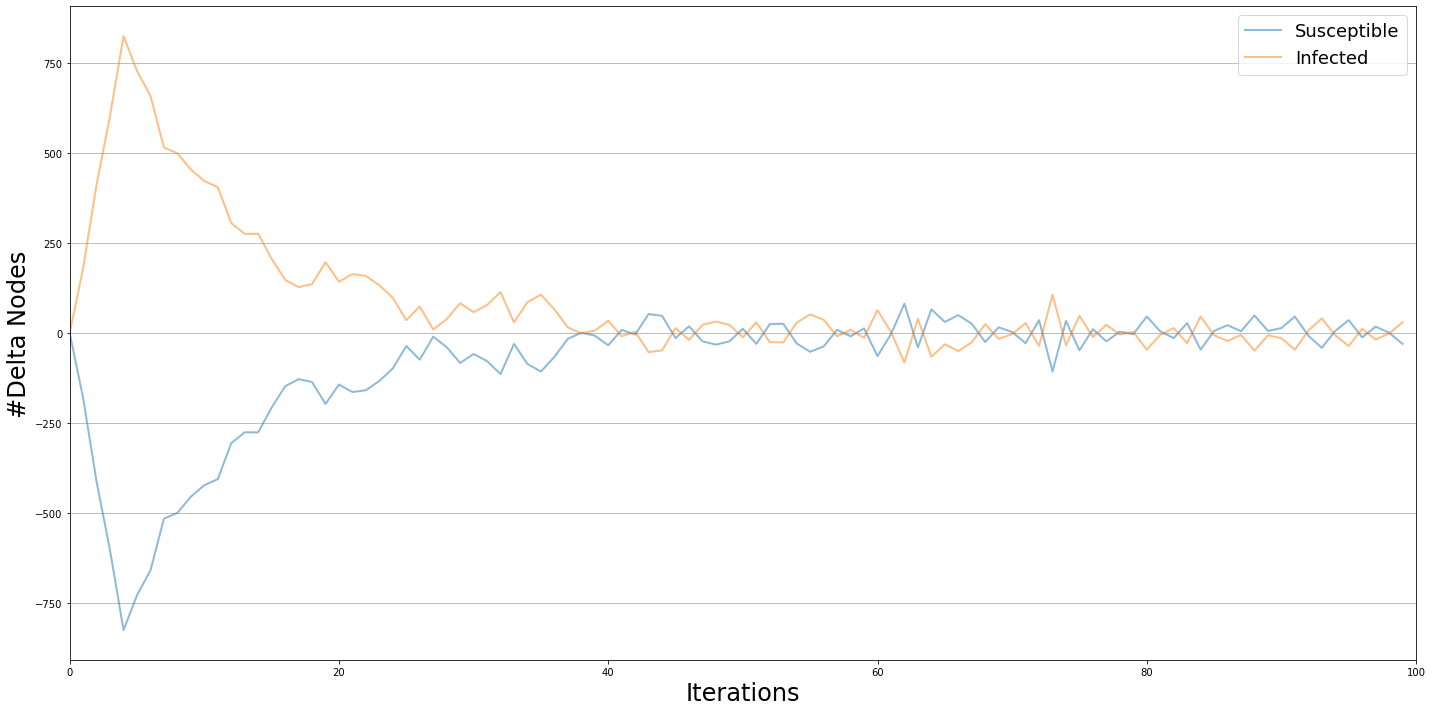

In [103]:
viz = DiffusionPrevalence(model, trends)
viz.plot()

## test 2: % infetti iniziali aumentata
con 70% calerebbe solamente

In [125]:
model = ep.SISModel(g)
model.available_statuses

{'Susceptible': 0, 'Infected': 1}

In [126]:
cfg = mc.Configuration()
cfg.add_model_parameter('beta', b3) # infection rate
cfg.add_model_parameter('lambda', u3) # recovery rate

cfg.add_model_parameter("percentage_infected", 0.4)
model.set_initial_status(cfg)

In [127]:
iterations = model.iteration_bunch(100, node_status=True)
trends = model.build_trends(iterations)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:19<00:00,  5.19it/s]


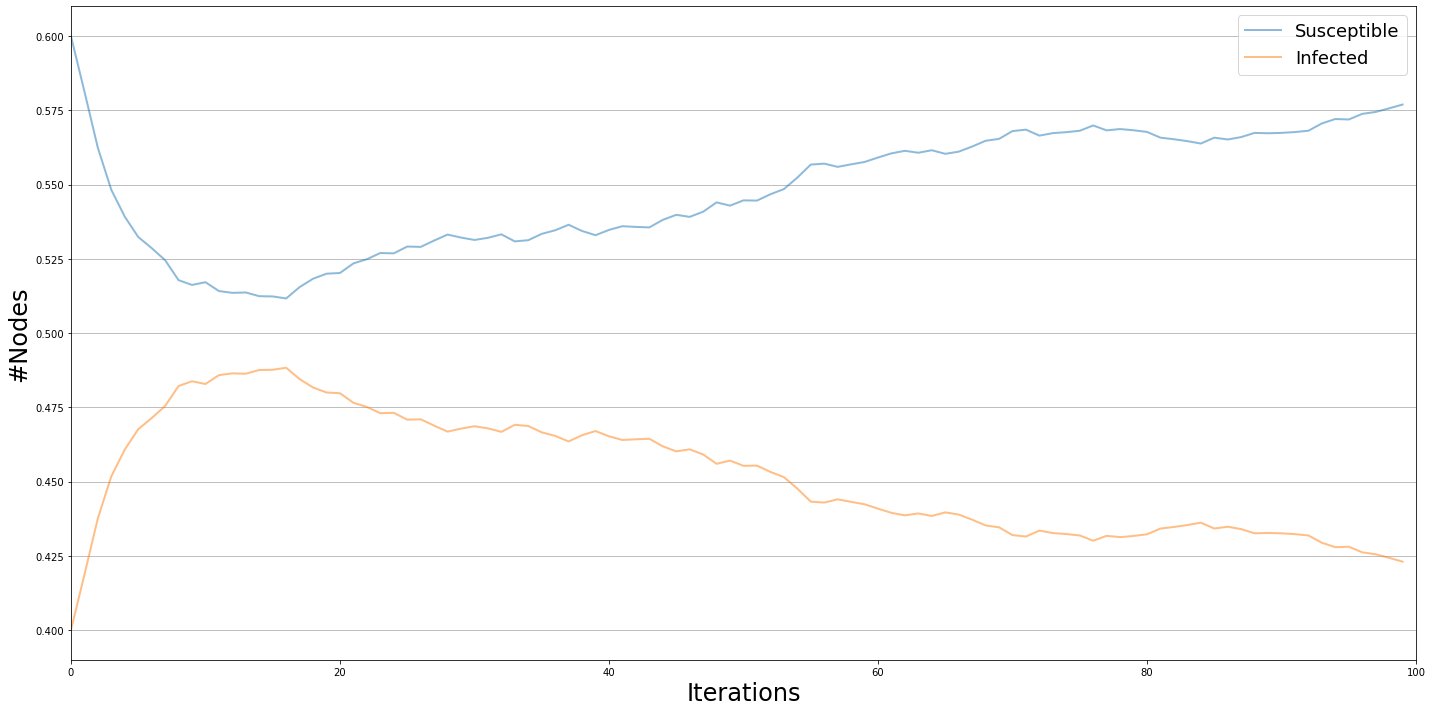

In [128]:
viz = DiffusionTrend(model, trends)
viz.plot()

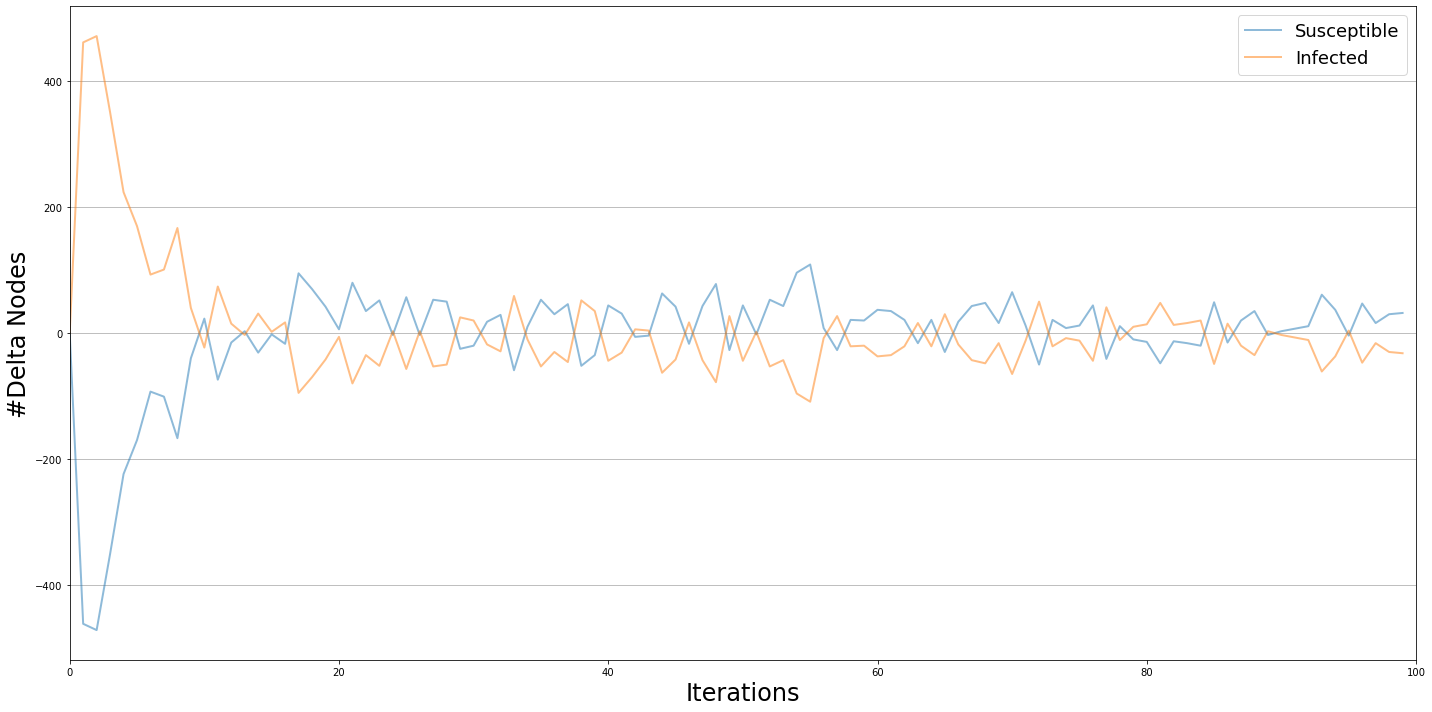

In [130]:
viz = DiffusionPrevalence(model, trends)
viz.plot()